# K-Means Clustering

### Import dataset

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- Here we are going to create K-means algorithm to identify some patterns, which help the mall to increase the average spending score of their customers overall

In [4]:
df.columns.tolist()

['Annual Income (k$)', 'Spending Score (1-100)']

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Using Elbow method to find optimum number of clusters

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",random_state=42)  # creating instance of class
    km.fit(X) # training K means algo
    wcss.append(km.inertia_) 

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\

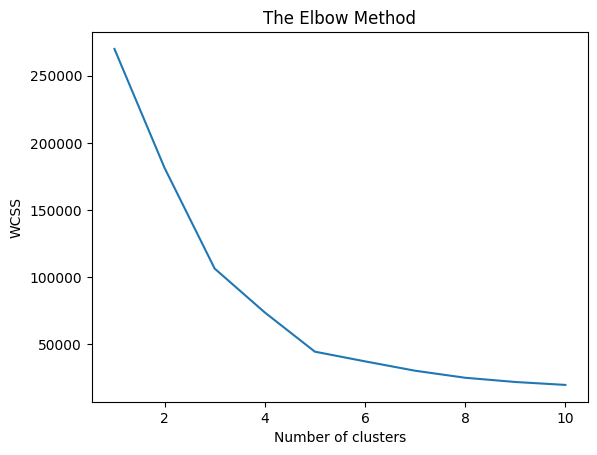

In [12]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In above graph the optimum number of cluster is 5 because having smallest negative slope

## Training the K-Means model on the dataset


In [13]:
km = KMeans(n_clusters=5,random_state=42,init="k-means++")
prediction = km.fit_predict(X)

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
prediction

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# Visualising the clusters

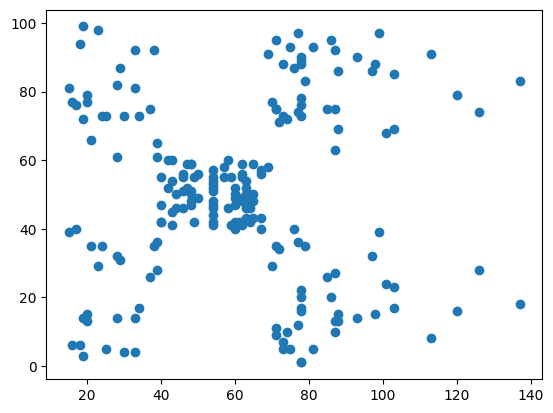

In [17]:
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

### Visuals after Applying k-means clustering

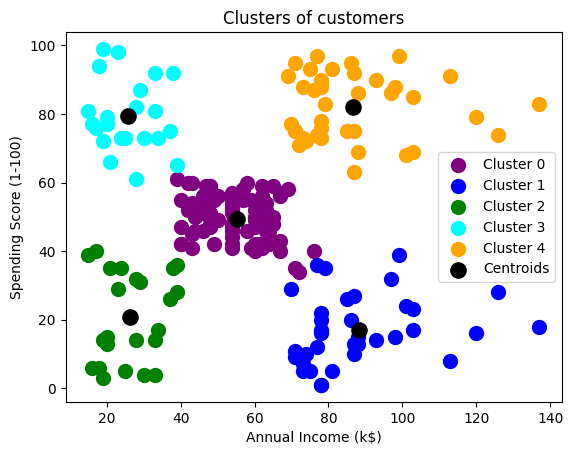

In [25]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s = 100, c = 'purple', label = 'Cluster 0') # X[prediction == 0, 0] this means that all the annual income of customers belonging to cluster of index 0
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[prediction == 3, 0], X[prediction == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[prediction == 4, 0], X[prediction == 4, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 120, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Here clearly the five clusters are identified by k-means algorithm for particular dataset..

* And so now, because it wants of course to incite their customers to spend more well maybe it can make some very nice you knoe, irresistible offers to those customers who don't spend more(like cluster 2) to push them a bit more in higher spending scores.